# ChemicalMotifIdentifier

**To reviewers:** As we are keeping these codes private untill acceptance of the work, the PyPi installation of the package will not work. Please follow the instructions below to install all packages and dependencies.

This is a quick tutorial on:
1. Analytically obtaining a pattern inventory for a quintenary system in the bcc crystal structure. 
1. Obtaining the pattern inventory with ML and creating a physically constrained embedding space from which we can compute dissimilarities between motifs. 
1. Computing dissimilarity between motifs in atomistic data of a bcc TaTiNbMo system.

In [2]:
%%capture 
! pip install gdown

! pip install chemicalmotifidentifier

! pip install rich

Obtaining file:///Users/killiansheriff/Desktop/ChemicalMotifIdentifier/examples/doi-TBD/_additional_packages/Polya
  Preparing metadata (setup.py) ... done
  Attempting uninstall: polya
    Found existing installation: polya 0.0.1
    Uninstalling polya-0.0.1:
      Successfully uninstalled polya-0.0.1
  Running setup.py develop for polya
Obtaining file:///Users/killiansheriff/Desktop/ChemicalMotifIdentifier/examples/doi-TBD/_additional_packages/NshellFinder
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for NshellFinder (pyproject.toml) ... done
  Created wheel for NshellFinder: filename=NshellFinder-0.0.5-0.editable-py3-none-any.whl size=2531 sha256=64fc207cd29cd0b71fc747944fa60d20de4043d7f8b6e60a09609c47d1cf5997
  Stored in directory: /private/var/folders/14/8lklrynj04jgznbn0p84mzy80000gn/T/pip-ephem-whee

In [5]:
%%capture
from polya import Polya
from rich import print
from sympy import init_printing, symbols  # For latex formatting
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

from _frameworks import INPUT_GDOWN_LINK

# Downloading neceassry inputs (model weights, dump files, ...)
import gdown

os.makedirs("data/", exist_ok=True)
gdown.download_folder(INPUT_GDOWN_LINK, output="data/", quiet=True,remaining_ok=True)

['data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx0.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx1.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx2.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx3.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx4.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx5.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx6.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx7.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx8.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx9.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx10.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx11.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx12.pt',
 'data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx13.pt',
 'data/inputs_doi-TBD/atom_types_generators/

## 1. Quintenary system pattern inventory

The pattern inventory for the bcc first coordination polyhedron of a quintenart system is given by:

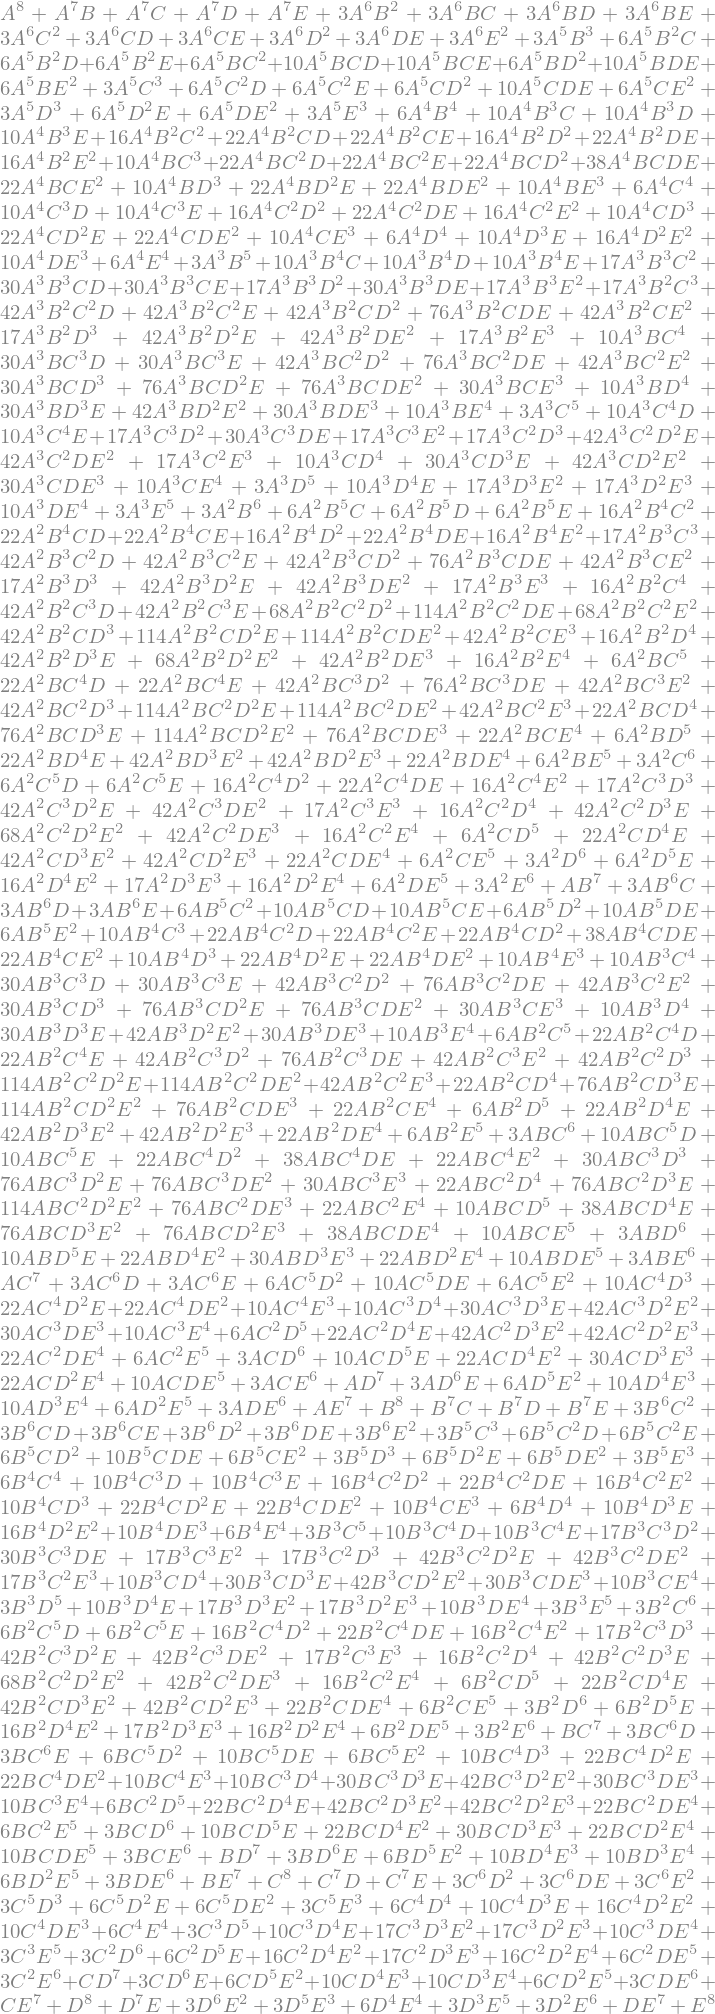

In [6]:
init_printing()

pl = Polya(graph_name="bcc")

ntypes = 5
p_g, nms = pl.get_gt(ntypes=ntypes)

p_g = p_g.subs(
    {
        symbols("t1"): symbols("A"),
        symbols("t2"): symbols("B"),
        symbols("t3"): symbols("C"),
        symbols("t4"): symbols("D"),
        symbols("t5"): symbols("E"),
    }
)

print(
    "The pattern inventory for the bcc first coordination polyhedron of a quintenart system is given by: \n"
)

p_g

In [7]:
print(
    f"\n We have a total of {nms} distinct coordination polyhedron, which in turns yield {nms*ntypes} distinct local chemical motifs. "
)

We have a total of 10375 distinct coordination polyhedron, which in turns yield 51875 distinct local chemical 
motifs.

## 2. Model expressivity on the bcc quintenarty synthetic dataset and physically constrained embedding space

In [8]:
%%capture 
from _frameworks import SyntheticChemicalMotifIdentifier

eca = SyntheticChemicalMotifIdentifier(crystal_structure="bcc")
df = eca.predict(
    root="data/synthetic/bcc_graph_datasets/",
    skeleton_graph_path="data/inputs_doi-TBD/bcc_1nn.pt",
    atom_types_paths=
        [f"data/inputs_doi-TBD/atom_types_generators/bcc_nelement5_idx{i}.pt" for i in range(0,107,1)
    ],
    nelement=5,
)
os.makedirs("data/synthetic/outputs/", exist_ok=True)
df.to_pickle("data/synthetic/outputs/df_bcc.pkl")

In [9]:
# Obtaining the ML pattern inventory
df = pd.read_pickle("data/synthetic/outputs/df_bcc.pkl")

shell_concentrations, counts = (
    np.array(list(df.shell_concentration)),
    np.array(list(df.counts)),
)
unique_concentrations, counts = np.unique(
    shell_concentrations, axis=0, return_counts=True
)

pattern = {
    tuple(unique_concentrations[i]): counts[i]
    for i in range(len(unique_concentrations))
}
print("The machine learning pattern inventory is given by:")
print(pattern)
print(f"We have a total of {np.sum(counts)} distinct 1CP.")

The machine learning pattern inventory is given by:

{
    (0.0, 0.0, 0.0, 0.0, 8.0): 1,
    (0.0, 0.0, 0.0, 1.0, 7.0): 1,
    (0.0, 0.0, 0.0, 2.0, 6.0): 3,
    (0.0, 0.0, 0.0, 3.0, 5.0): 3,
    (0.0, 0.0, 0.0, 4.0, 4.0): 6,
    (0.0, 0.0, 0.0, 5.0, 3.0): 3,
    (0.0, 0.0, 0.0, 6.0, 2.0): 3,
    (0.0, 0.0, 0.0, 7.0, 1.0): 1,
    (0.0, 0.0, 0.0, 8.0, 0.0): 1,
    (0.0, 0.0, 1.0, 0.0, 7.0): 1,
    (0.0, 0.0, 1.0, 1.0, 6.0): 3,
    (0.0, 0.0, 1.0, 2.0, 5.0): 6,
    (0.0, 0.0, 1.0, 3.0, 4.0): 10,
    (0.0, 0.0, 1.0, 4.0, 3.0): 10,
    (0.0, 0.0, 1.0, 5.0, 2.0): 6,
    (0.0, 0.0, 1.0, 6.0, 1.0): 3,
    (0.0, 0.0, 1.0, 7.0, 0.0): 1,
    (0.0, 0.0, 2.0, 0.0, 6.0): 3,
    (0.0, 0.0, 2.0, 1.0, 5.0): 6,
    (0.0, 0.0, 2.0, 2.0, 4.0): 16,
    (0.0, 0.0, 2.0, 3.0, 3.0): 17,
    (0.0, 0.0, 2.0, 4.0, 2.0): 16,
    (0.0, 0.0, 2.0, 5.0, 1.0): 6,
    (0.0, 0.0, 2.0, 6.0, 0.0): 3,
    (0.0, 0.0, 3.0, 0.0, 5.0): 3,
    (0.0, 0.0, 3.0, 1.0, 4.0): 10,
    (0.0, 0.0, 3.0, 2.0, 3.0): 17,
    (0.0, 0.0, 3.0, 3.0, 2.0): 17,
    (0.0, 0.0, 3.0, 4.0, 1.0): 10,
    (0.0, 0.0, 3.0, 5.0, 0.0): 3,
    (0.0, 0.0, 4.0, 0.0, 4.0): 6,
    (0.0, 0.0, 4.0, 1.0, 3.0): 10,
    (0.0, 0.0, 4.0, 2.0, 2.0): 16,
    (0.0, 0.0, 4.0, 3.0, 1.0): 10,
    (0.0, 0.0, 4.0, 4.0, 0.0): 6,
    (0.0, 0.0, 5.0, 0.0, 3.0): 3,
    (0.0, 0.0, 5.0, 1.0, 2.0): 6,
    (0.0, 0.0, 5.0, 2.0, 1.0): 6,
    (0.0, 0.0, 5.0, 3.0, 0.0): 3,
    (0.0, 0.0, 6.0, 0.0, 2.0): 3,
    (0.0, 0.0, 6.0, 1.0, 1.0): 3,
    (0.0, 0.0, 6.0, 2.0, 0.0): 3,
    (0.0, 0.0, 7.0, 0.0, 1.0): 1,
    (0.0, 0.0, 7.0, 1.0, 0.0): 1,
    (0.0, 0.0, 8.0, 0.0, 0.0): 1,
    (0.0, 1.0, 0.0, 0.0, 7.0): 1,
    (0.0, 1.0, 0.0, 1.0, 6.0): 3,
    (0.0, 1.0, 0.0, 2.0, 5.0): 6,
    (0.0, 1.0, 0.0, 3.0, 4.0): 10,
    (0.0, 1.0, 0.0, 4.0, 3.0): 10,
    (0.0, 1.0, 0.0, 5.0, 2.0): 6,
    (0.0, 1.0, 0.0, 6.0, 1.0): 3,
    (0.0, 1.0, 0.0, 7.0, 0.0): 1,
    (0.0, 1.0, 1.0, 0.0, 6.0): 3,
    (0.0, 1.0, 1.0, 1.0, 5.0): 10,
    (0.0, 1.0, 1.0, 2.0, 4.0): 22,
    (0.0, 1.0, 1.0, 3.0, 3.0): 30,
    (0.0, 1.0, 1.0, 4.0, 2.0): 22,
    (0.0, 1.0, 1.0, 5.0, 1.0): 10,
    (0.0, 1.0, 1.0, 6.0, 0.0): 3,
    (0.0, 1.0, 2.0, 0.0, 5.0): 6,
    (0.0, 1.0, 2.0, 1.0, 4.0): 22,
    (0.0, 1.0, 2.0, 2.0, 3.0): 42,
    (0.0, 1.0, 2.0, 3.0, 2.0): 42,
    (0.0, 1.0, 2.0, 4.0, 1.0): 22,
    (0.0, 1.0, 2.0, 5.0, 0.0): 6,
    (0.0, 1.0, 3.0, 0.0, 4.0): 10,
    (0.0, 1.0, 3.0, 1.0, 3.0): 30,
    (0.0, 1.0, 3.0, 2.0, 2.0): 42,
    (0.0, 1.0, 3.0, 3.0, 1.0): 30,
    (0.0, 1.0, 3.0, 4.0, 0.0): 10,
    (0.0, 1.0, 4.0, 0.0, 3.0): 10,
    (0.0, 1.0, 4.0, 1.0, 2.0): 22,
    (0.0, 1.0, 4.0, 2.0, 1.0): 22,
    (0.0, 1.0, 4.0, 3.0, 0.0): 10,
    (0.0, 1.0, 5.0, 0.0, 2.0): 6,
    (0.0, 1.0, 5.0, 1.0, 1.0): 10,
    (0.0, 1.0, 5.0, 2.0, 0.0): 6,
    (0.0, 1.0, 6.0, 0.0, 1.0): 3,
    (0.0, 1.0, 6.0, 1.0, 0.0): 3,
    (0.0, 1.0, 7.0, 0.0, 0.0): 1,
    (0.0, 2.0, 0.0, 0.0, 6.0): 3,
    (0.0, 2.0, 0.0, 1.0, 5.0): 6,
    (0.0, 2.0, 0.0, 2.0, 4.0): 16,
    (0.0, 2.0, 0.0, 3.0, 3.0): 17,
    (0.0, 2.0, 0.0, 4.0, 2.0): 16,
    (0.0, 2.0, 0.0, 5.0, 1.0): 6,
    (0.0, 2.0, 0.0, 6.0, 0.0): 3,
    (0.0, 2.0, 1.0, 0.0, 5.0): 6,
    (0.0, 2.0, 1.0, 1.0, 4.0): 22,
    (0.0, 2.0, 1.0, 2.0, 3.0): 42,
    (0.0, 2.0, 1.0, 3.0, 2.0): 42,
    (0.0, 2.0, 1.0, 4.0, 1.0): 22,
    (0.0, 2.0, 1.0, 5.0, 0.0): 6,
    (0.0, 2.0, 2.0, 0.0, 4.0): 16,
    (0.0, 2.0, 2.0, 1.0, 3.0): 42,
    (0.0, 2.0, 2.0, 2.0, 2.0): 68,
    (0.0, 2.0, 2.0, 3.0, 1.0): 42,
    (0.0, 2.0, 2.0, 4.0, 0.0): 16,
    (0.0, 2.0, 3.0, 0.0, 3.0): 17,
    (0.0, 2.0, 3.0, 1.0, 2.0): 42,
    (0.0, 2.0, 3.0, 2.0, 1.0): 42,
    (0.0, 2.0, 3.0, 3.0, 0.0): 17,
    (0.0, 2.0, 4.0, 0.0, 2.0): 16,
    (0.0, 2.0, 4.0, 1.0, 1.0): 22,
    (0.0, 2.0, 4.0, 2.0, 0.0): 16,
    (0.0, 2.0, 5.0, 0.0, 1.0): 6,
    (0.0, 2.0, 5.0, 1.0, 0.0): 6,
    (0.0, 2.0, 6.0, 0.0, 0.0): 3,
    (0.0, 3.0, 0.0, 0.0, 5.0): 3,
    (0.0, 3.0, 0.0, 1.0, 4.0): 10,
    (0.0, 3.0, 0.0, 2.0, 3.0): 17,
    (0.0, 3.0, 0.0, 3.0, 2.0): 17,
    (0.0, 3.0, 0.0, 4.0, 1.0): 10,
    (0.0, 3.0, 0.0, 5.0, 0.0): 3,
    (0.0, 3.0, 1.0, 0.0, 4.0): 1

We have a total of 10375 distinct 1CP.

## 3. Chemical motif identification in atomistic data

In [11]:
%%capture 
from _frameworks import MonteCarloChemicalMotifIdentifier

dump_files = [
    f"data/inputs_doi-TBD/dumps/ordered_relaxation_{i}_300K.dump"
    for i in range(1, 5 + 1)
]

eca = MonteCarloChemicalMotifIdentifier(crystal_structure="bcc")
df = eca.predict(root="data/mc/outputs/eca_id/300K/", dump_file=dump_files)
kl = eca.get_kl(df)
df.to_pickle("data/mc/outputs/eca_id/300K/df_microstates.pkl")

Let's compute the dissimilarity between motif $\mathcal{M}_0$ and $\mathcal{M}_1$ shown below: 

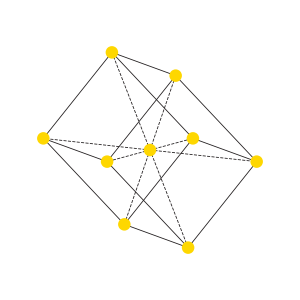

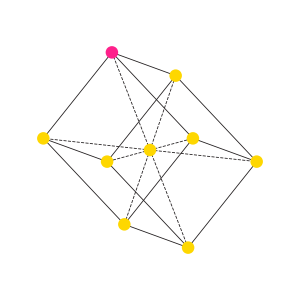

In [14]:
from chemicalmotifidentifier import Plot
plot = Plot(
    structure="bcc",
    graph_folder="data/inputs_doi-TBD/graph_plot_templates/",
)
plot.set_colors(np.array([
            "#FED700",
            "#21B0FE",
            "#FE218B",
            "#90C47F",
        ]))
plot.set_node_size(4)
plot.set_width(0.2)

for i in [0, 1]:
    df_row = df.iloc[i]

    types_with_central_atom = np.concatenate(
        ([df_row.central_atom_type], np.array(list(df_row.shell_atomic_types)))
    )

    fig, ax = plt.subplots(figsize=(1, 1))
    plot.plot_ms(new_atom_types=types_with_central_atom)
    plt.show()

In [16]:
from chemicalmotifidentifier import Dissimilarity

phys_emb_i = np.concatenate(([df.iloc[0].central_atom_type], df.iloc[0].shell_phys_emb))
phys_emb_j = np.concatenate(([df.iloc[1].central_atom_type], df.iloc[1].shell_phys_emb))

(
    central_atom_dissim,
    concentration_dissim,
    structural_dissim,
) = Dissimilarity().get_separate_dissimilarities(5, phys_emb_j, phys_emb_i)

weights = np.array([8.0, 12.0, 12.0])
weights *= 1 / np.sum(weights)
d_ij = (
    weights[0] * central_atom_dissim
    + weights[1] * concentration_dissim / 8
    + weights[2] * structural_dissim
)


print(f"The dissimilarity between these two motifs is: {d_ij[0]:.2f}.\n\nBefore weighthing based on the number of bonds of each structure, they have a central atom dissimilarity of {central_atom_dissim[0]:.2f} since their central atom atomic types are the same. Their chemical composition dissimilarity is of {concentration_dissim[0]:.2f}/8 because only two atoms are swapped. And their structural dissimilarity is of {structural_dissim[0]:.2f}.")

The dissimilarity between these two motifs is: 0.08.

Before weighthing based on the number of bonds of each structure, they have a central atom dissimilarity of 0.00 
since their central atom atomic types are the same. Their chemical composition dissimilarity is of 1.00/8 because 
only two atoms are swapped. And their structural dissimilarity is of 0.09.